In [125]:
'''
Debes escribir un programa que realice las siguientes tareas:

1. Importar los dos datasets adjuntos con la tarea y guardarlos en dos Dataframes. Analiza los datos.
2. Crea un DataFrame que incluya una columna con el coste mensual de Netflix, otra con el salario medio y otra con la mediana.
3. Normaliza los datos del DataFrame creado en el punto 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona (que tendrán inicialmente un rango muy distinto). Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. Puedes usar uno o probar varios. Si haces esto último debes hacer varios métodos.

https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

4. Finalmente debes pintar una gráfica con los datos por países ya normalizados y contestar a la pregunta. ¿Existe relación entre lo que gana una persona en cada país y lo que debe pagar por Netflix?

'''

import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

df_netflix = pd.df = pd.read_csv("Netflix subscription fee Dec-2021.csv", sep=",") # Determinar con que caracteteres se separa el csv
df_salarios = pd.df = pd.read_csv("salaries_by_country_2021.csv")



In [126]:
df_netflix.head(5)


,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [127]:
df_salarios.head(5)

,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321,31376,124590,634.814
1,United Arab Emirates,24292,27017,70089,9991.089
2,Switzerland,21490,25787,72376,8715.494
3,United States,19306,25332,65297,332915.073
4,Norway,22684,25272,70005,5465.630


In [128]:
country = []
netflixStandar = []
salarioMedio = []
salarioMediana = []

df_unido = df_netflix.merge(df_salarios, how = "inner", left_on = "Country", right_on = "country",)

country = df_unido["country"].to_list()
netflixStandar = df_unido["Cost Per Month - Standard ($)"].tolist()
salarioMedio = df_unido["meanIncome"].tolist()
salarioMediana = df_unido["medianIncome"].tolist()

df_unido.head()


,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,Argentina,5319,6935,0,45605.826
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Australia,17076,21329,53381,25788.215
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Austria,18405,20718,60418,9043.070
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Belgium,16157,17917,56348,11632.326
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,Bolivia,3631,4787,9110,11832.940


In [129]:
# 2. Crea un DataFrame que incluya una columna con el coste mensual de Netflix, otra con el salario medio y otra con la mediana.

df_unido = df_unido[["Cost Per Month - Standard ($)", "meanIncome", "medianIncome"]]

df_netflix_salaries = pd.DataFrame( {
    "Country" : country,
    "Cost Per Month - Standard ($)" : netflixStandar,
    "meanIncome" : salarioMedio,
    "medianIncome" : salarioMediana
    })
df_netflix_salaries.head()
#df_unido.head()



,Country,Cost Per Month - Standard ($),meanIncome,medianIncome
0,Argentina,6.30,6935,5319
1,Australia,12.12,21329,17076
2,Austria,14.67,20718,18405
3,Belgium,15.24,17917,16157
4,Bolivia,10.99,4787,3631


In [130]:
#3. Normaliza los datos del DataFrame creado en el punto 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. 
# En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona (que tendrán inicialmente un rango muy distinto). Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. Puedes usar uno o probar varios. Si haces esto último debes hacer varios métodos.

from sklearn.preprocessing import MinMaxScaler 
escalador = MinMaxScaler()
df_netflix_salaries[['Cost Per Month - Standard ($)', 'meanIncome', 'medianIncome']] = escalador.fit_transform(df_netflix_salaries[['Cost Per Month - Standard ($)', 'meanIncome', 'medianIncome']])
df_netflix_salaries.head()
#df_unido.describe()


,Country,Cost Per Month - Standard ($),meanIncome,medianIncome
0,Argentina,0.189003,0.229682,0.234482
1,Australia,0.522337,0.817840,0.752777
2,Austria,0.668385,0.792874,0.811365
3,Belgium,0.701031,0.678421,0.712264
4,Bolivia,0.457617,0.141911,0.160069


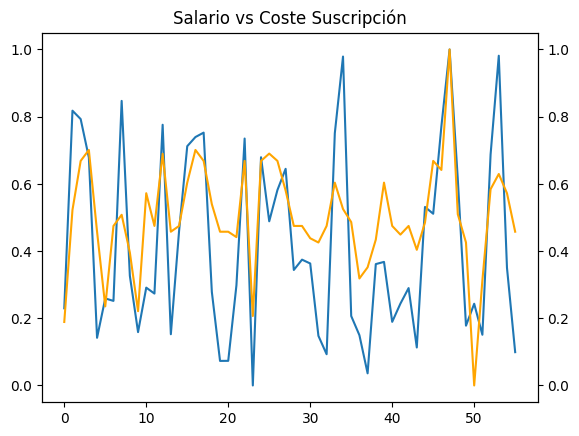

In [131]:
# 4. Finalmente debes pintar una gráfica con los datos por países ya normalizados y contestar a la pregunta. ¿Existe relación entre lo que gana una persona en cada país y lo que debe pagar por Netflix?


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title("Salario vs Coste Suscripción") # Título

ax1.plot(df_netflix_salaries["meanIncome"]) # Eje X
ax2.plot(df_netflix_salaries["Cost Per Month - Standard ($)"], color="orange") # Eje Y
#plt.xticks(rotation=90)
plt.show()  


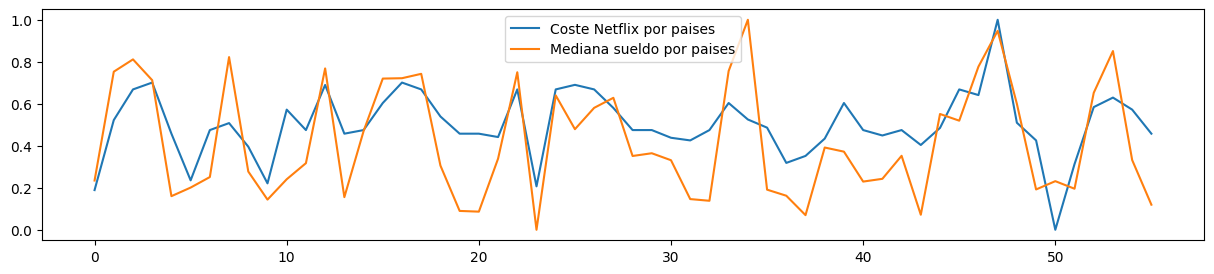

"\nplt.figure(figsize=(15,3))\nplt.plot(cuotas_netflix)\nplt.plot(salarios_medios)\nplt.legend(['Coste Netflix por paises','Media sueldo por paises'])\nplt.show()\n"

In [132]:
cuotas_netflix = df_netflix_salaries['Cost Per Month - Standard ($)']
medianas_salarios = df_netflix_salaries['medianIncome']
salarios_medios  = df_netflix_salaries['meanIncome']

plt.figure(figsize=(15,3))
plt.plot(cuotas_netflix)
plt.plot(medianas_salarios)
plt.legend(['Coste Netflix por paises','Mediana sueldo por paises'])
plt.show()

'''
plt.figure(figsize=(15,3))
plt.plot(cuotas_netflix)
plt.plot(salarios_medios)
plt.legend(['Coste Netflix por paises','Media sueldo por paises'])
plt.show()
'''

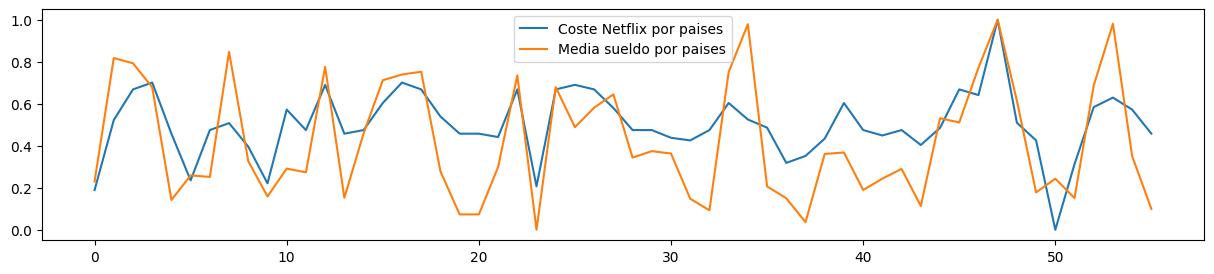

In [133]:

plt.figure(figsize=(15,3))
plt.plot(cuotas_netflix)
plt.plot(salarios_medios)
plt.legend(['Coste Netflix por paises','Media sueldo por paises'])
plt.show()
